In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()
import os
import sklearn as sk
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats 
%matplotlib inline 

In [2]:
train=pd.read_csv("1:train.csv") #importing the train file

In [3]:
test=pd.read_csv("2:test.csv") #importing the test file 

In [4]:
gender_submission=pd.read_csv("3:gender_submission.csv") #importing the gender submission file 

In [5]:
test["Survived"]=gender_submission["Survived"]

In [6]:
train.head(10) #visualising parts of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
test.count() #Shows the amount of values for each column of the test dataset

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
Survived       418
dtype: int64

In [8]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [10]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [11]:
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,1
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,1
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [12]:
train.columns #Shows the columns of the train dataset 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Passengers who survived compared to the Fare they payed')

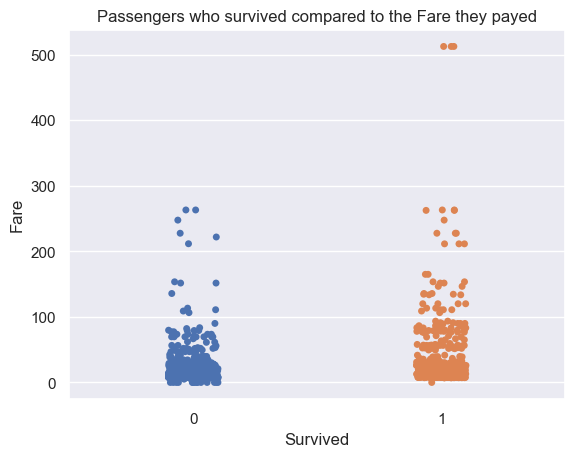

In [13]:
sns.stripplot(x=train['Survived'],y=train['Fare'])
plt.title("Passengers who survived compared to the Fare they payed")

In [14]:
train.isnull().sum() #shows the null values in the train dataset 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Setting up the strategy for missing numerical values in the dataset

from sklearn.impute import SimpleImputer
numeric_columns_to_impute = ["Age", "SibSp", "Parch", "Fare"]
imputer = SimpleImputer(strategy='median') #for every empty numerical value, we fill the column with the median
train[numeric_columns_to_impute] = imputer.fit_transform(train[numeric_columns_to_impute])

#using the most common value in "Embarked" to fill the blank cells

train["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
numeric_columns_to_impute = ["Age", "SibSp", "Parch", "Fare"]
imputer = SimpleImputer(strategy='median') #for every empty numerical value, we fill the column with the mean 
test[numeric_columns_to_impute] = imputer.fit_transform(test[numeric_columns_to_impute])

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [20]:
#we can see that there is too much data missing for the cabin column and it's impossible to fill 
#we can create a new_train that removes the cabin column 
#we also remove the passenger names as it isn't useful to determine their odds of survival 

In [21]:
#creating new datasets without the Cabin column 

newtr=train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
newte=test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

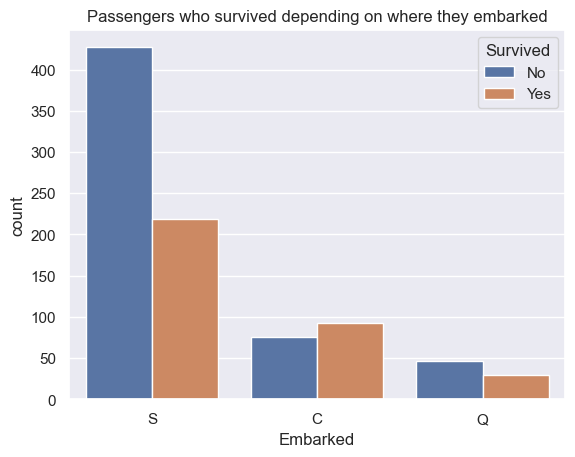

In [22]:
sns.countplot(data=newtr, x='Embarked', hue='Survived')
plt.title('Passengers who survived depending on where they embarked')
plt.legend(title="Survived",labels=["No","Yes"])
plt.show()

In [23]:
newtr.isnull().sum() #No more missing data

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [24]:
newte.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [25]:
count_passengers=newtr[["Sex","PassengerId"]]
count_passengers.groupby(['Sex']).count() #Gives the total amount of passengers for each sex

,PassengerId
Sex,
female,314
male,577


In [26]:
survived_by_sex = newtr[newtr["Survived"] == 1].groupby("Sex")["Survived"].count() #gives the amount of passengers who survived for females and males
print(survived_by_sex)

Sex
female    233
male      109
Name: Survived, dtype: int64


In [27]:
# we can change the Embarked and Sex column and change them into binary values to limit the amount of
#non-numerical values 

new_train_1=pd.get_dummies(newtr, columns=["Sex","Embarked"])
new_test_1=pd.get_dummies(newte,columns=["Sex","Embarked"])

In [28]:
#reorganizing the columns to keep the survived column last 

new_train_clean=new_train_1[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived']]
new_test_clean=new_test_1[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived']]


In [29]:
#Separating the train and test datasets into X_train,y_train
#X_test and y_test

X_train=new_train_clean.iloc[:,0:11] 
y_train=new_train_clean.iloc[:,11] 
X_test=new_test_clean.iloc[:,0:11]
y_test=new_test_clean.iloc[:,11]

In [30]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0.0,0.0,7.8292,0,1,0,1,0
1,893,3,47.0,1.0,0.0,7.0000,1,0,0,0,1
2,894,2,62.0,0.0,0.0,9.6875,0,1,0,1,0
3,895,3,27.0,0.0,0.0,8.6625,0,1,0,0,1
4,896,3,22.0,1.0,1.0,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0.0,0.0,8.0500,0,1,0,0,1
414,1306,1,39.0,0.0,0.0,108.9000,1,0,1,0,0
415,1307,3,38.5,0.0,0.0,7.2500,0,1,0,0,1
416,1308,3,27.0,0.0,0.0,8.0500,0,1,0,0,1


In [31]:
print(X_train.shape) #checking that there is the same number of columns
print(X_test.shape)

(891, 11)
(418, 11)


In [32]:
model = LogisticRegression(max_iter=1000) #creating the model with Logistic Regression
model.fit(X_train, y_train) #training the model
y_predict=model.predict(X_test)

In [33]:
from sklearn.metrics import precision_score  
#precision score:proportion of true positive predictions among all positive predictions
precision = precision_score(y_test, y_predict)
precision


0.8895705521472392

In [34]:
from sklearn.metrics import recall_score #true positive rate (recall)
recall = recall_score(y_test, y_predict)
recall

0.9539473684210527

In [35]:
from sklearn.metrics import f1_score #f1_score is the harmonic mean of precision and recall
f1 = f1_score(y_test, y_predict)
f1

0.9206349206349206

0.9401913875598086
[[248  18]
 [  7 145]] [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


<AxesSubplot:>

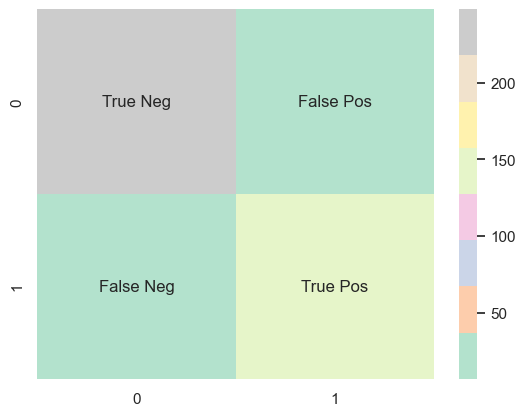

In [36]:
model_score=model.score(X_test,y_test) #Accuracy of the model 
print(model_score)

cf_matrix=metrics.confusion_matrix(y_test,y_predict) #confusion matrix comparing y_test (the data in
# gender_submission ) and y_predict which is the predictions of the model based on X_test
print(cf_matrix,y_predict)

labels=['True Neg','False Pos','False Neg','True Pos']
labels=np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Pastel2')

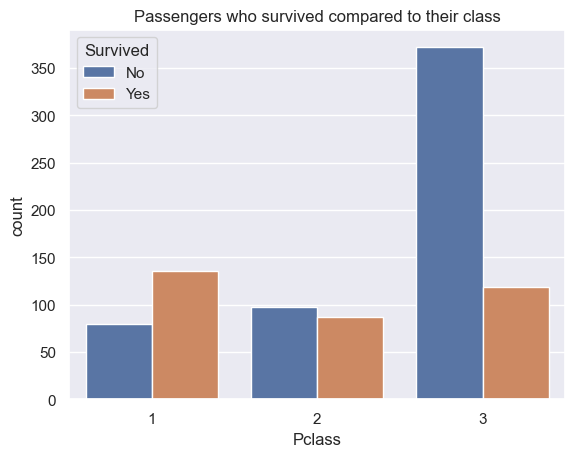

In [37]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Passengers who survived compared to their class')
plt.legend(title="Survived",labels=["No","Yes"])
plt.show()

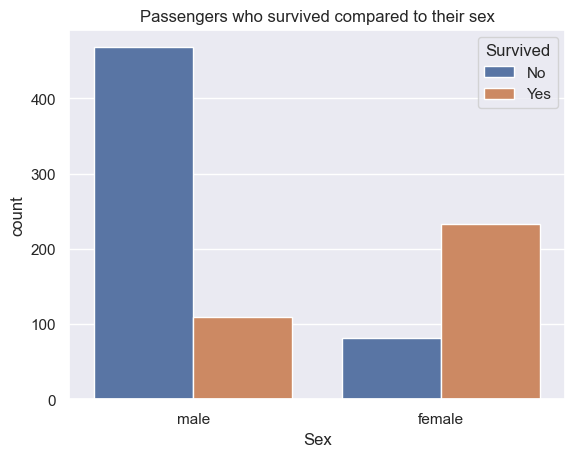

In [38]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Passengers who survived compared to their sex')
plt.legend(title="Survived",labels=["No","Yes"])
plt.show()

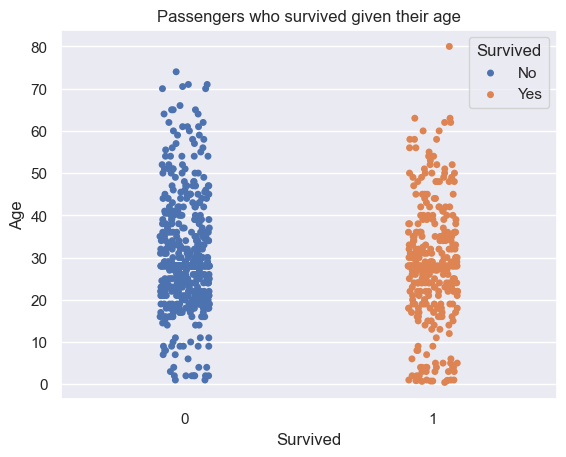

In [39]:
sns.stripplot(x=newtr['Survived'],y=newtr['Age'])
plt.title('Passengers who survived given their age')
plt.legend(title="Survived",labels=["No","Yes"])
plt.show()

In [40]:
#Saving the model

from joblib import dump
dump(model, 'titanic_model.joblib')

['titanic_model.joblib']